# TASK-3: Car Price Prediction with Machine Learning.

## ● Collect car-related features like brand goodwill, horsepower, mileage, etc.

## ● Train a regression model to predict car prices based on these features.

## ● Handle data preprocessing, feature engineering, and model evaluation.

## ● Use Python libraries like Pandas, Scikit-learn and Matplotlib for the workflow.

## ● Understand real-world applications of machine learning in price prediction.

# Importing Libraries:

In [19]:
# Car Price Prediction - Machine Learning Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load Dataset:

In [20]:
df = pd.read_csv("Car data.csv")
print("First 5 rows:\n", df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null   

# Data Preprocessing:

In [21]:
# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Fill missing values (if any)
df.fillna(df.median(), inplace=True)


Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


# Define Features (X) and Target (y):

In [22]:
X = df.drop('Selling_Price', axis=1)  # Assuming 'Selling_Price' is target
y = df['Selling_Price']

# Train-Test Split:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling:

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Train Model:

In [25]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Predictions:

In [26]:
y_pred = model.predict(X_test)

#  Evaluation:

In [27]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel R² Score: {r2:.2f}")
print(f"Model RMSE: {rmse:.2f}")


Model R² Score: 0.96
Model RMSE: 0.90


#  Visualization:

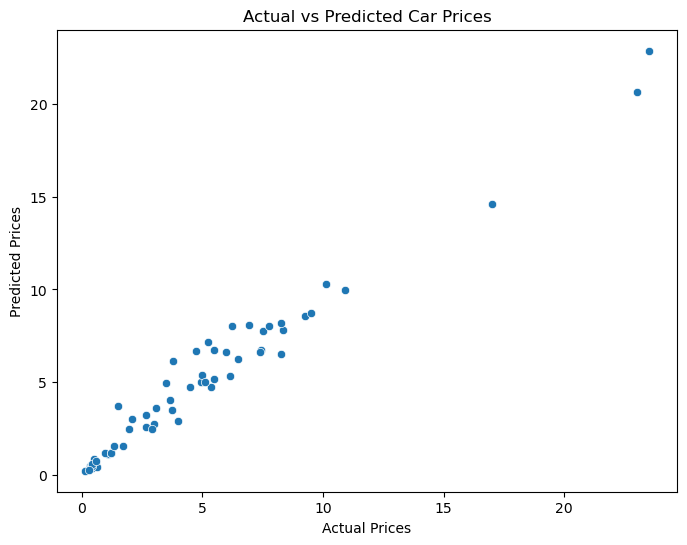

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()

# Feature Importance:

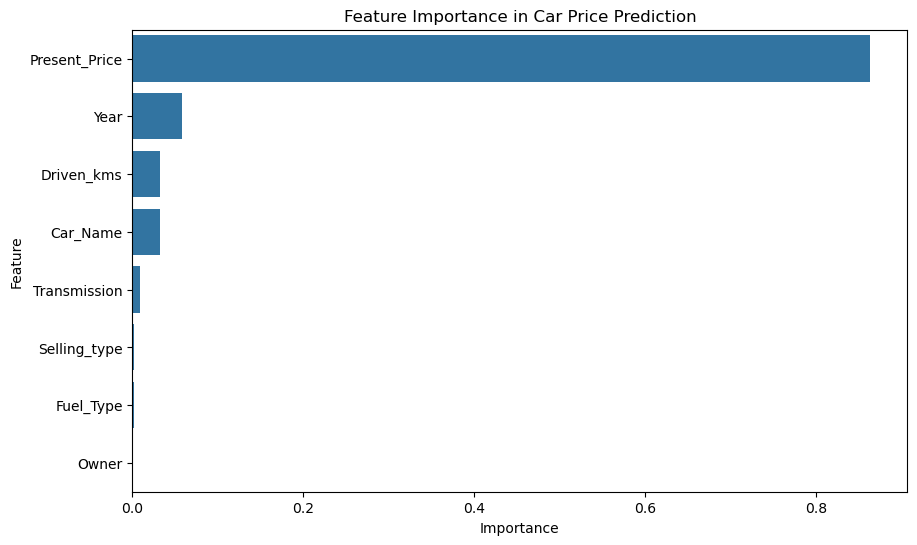

In [29]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance in Car Price Prediction")
plt.show()